In [1]:
# This is my first Vs code on jupyter notebook

import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # for ggplot-line style

# Check for latest version of matplotlib
print('Matplolib version:', mpl._version)

Matplolib version: <module 'matplotlib._version' from 'c:\\Users\\prabh\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\_version.py'>


In [2]:
df_can= pd.read_csv('Dataset of_canadian_immigrants.csv')

In [3]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [4]:
# shape/indices/data dimention

df_can.shape

(195, 39)

In [5]:
# Let's make a Country name as Index. And see the first five element of the dataframe

df_can.set_index('Country', inplace=True)

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [6]:
# Let's create a list of years from 1980 - 2013 which this will come in handy when we start plotting the data

years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

                                             AREA PLOT or STACKED lINE PLOT

In [7]:
# I created a line plot that visualized the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013.

df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


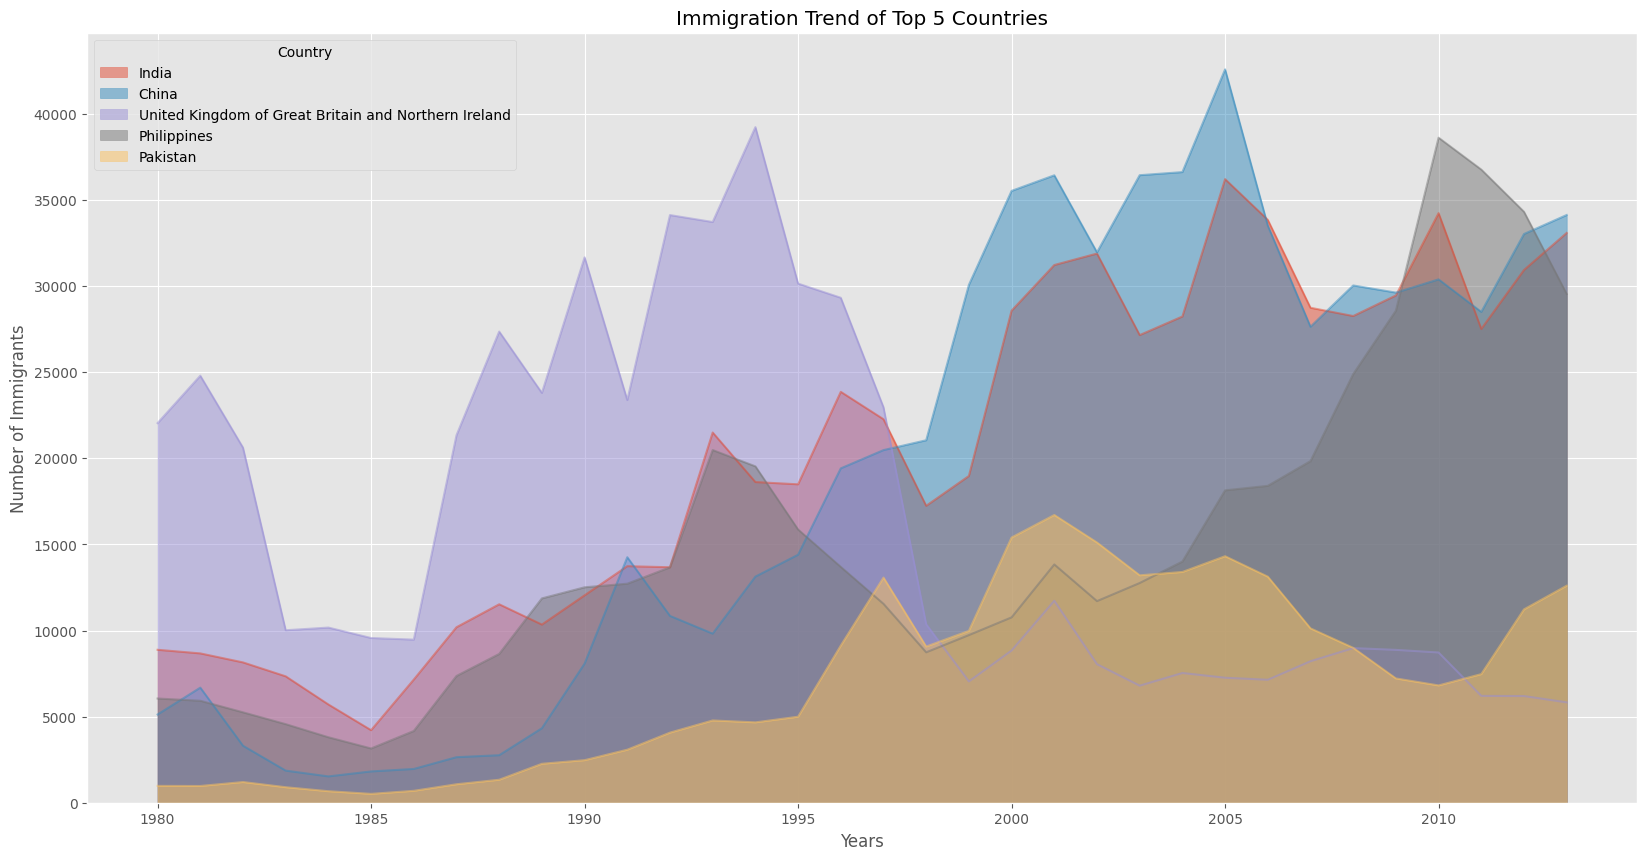

In [8]:
# let's change the index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()


# The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the alpha parameter. 0 - 1, default value alpha = 0.5

# df_top5.plot(kind='area', 
#              alpha=0.25,  
#              stacked=False,
#              figsize=(20, 10))

# plt.title('Immigration Trend of Top 5 Countries')
# plt.ylabel('Number of Immigrants')
# plt.xlabel('Years')

# plt.show()

                                                 Histogram Plot
                                                                    

 I am tring to plotting the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013.

In [9]:
# Let's quickly see the 2013 data

df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


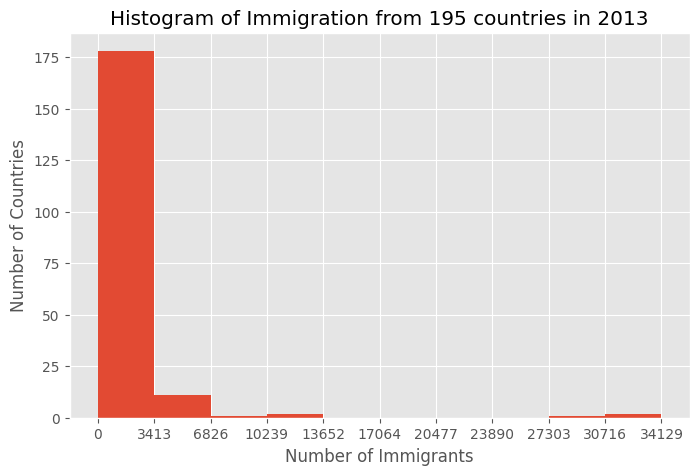

In [10]:
# 'bin_edges' is a list of bin intervals and bin ranges, default = 10 bins
# Count for frequency of count the number of data points

count, bin_edges = np.histogram(df_can['2013'])

print(count) 
print(bin_edges) 

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') 
plt.ylabel('Number of Countries') 
plt.xlabel('Number of Immigrants') 

plt.show()

In [11]:
# Distribution of the population for the 3 countries, pandas instead plotted the population frequency distribution for the years.append
# First transposing the dataset

df_hist= df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_hist.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


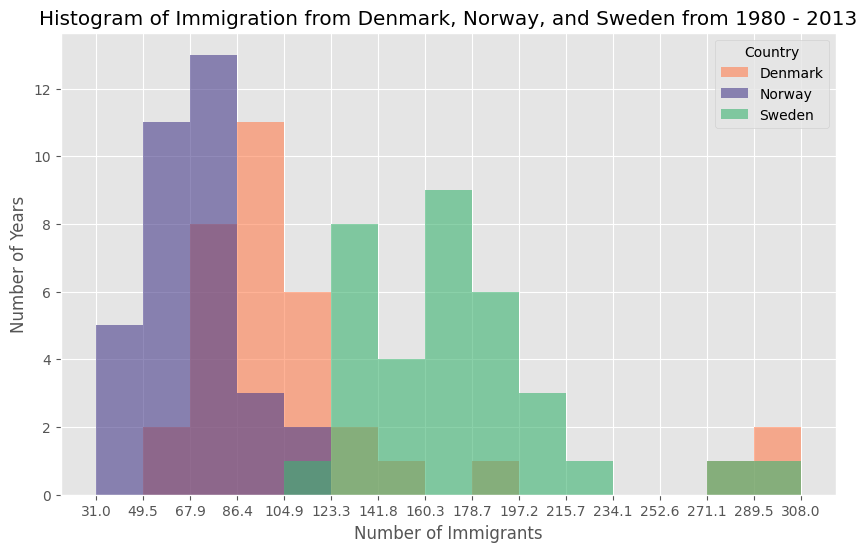

In [12]:
# increase the bin size to 15 by passing in bins parameter;
# set transparency to 60% by passing in alpha parameter;
# label the x-axis by passing in x-label parameter;
# change the colors of the plots by passing in color parameter.

count, bin_edges = np.histogram(df_hist, 15)

df_hist.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

                                                      Bar Plot

                                           Vertical (kind= 'bar') & Horizontal (kind= 'barh')Bar Plot

In [13]:
# Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013

df_Ice = df_can.loc['Iceland', years]
df_Ice.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

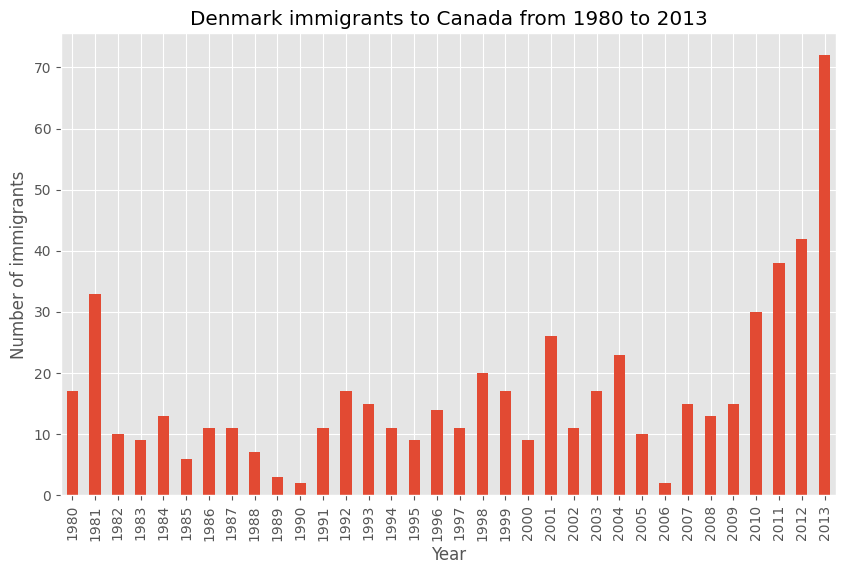

In [14]:
# Plotting data with vertical bar plot

df_Ice.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Denmark immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

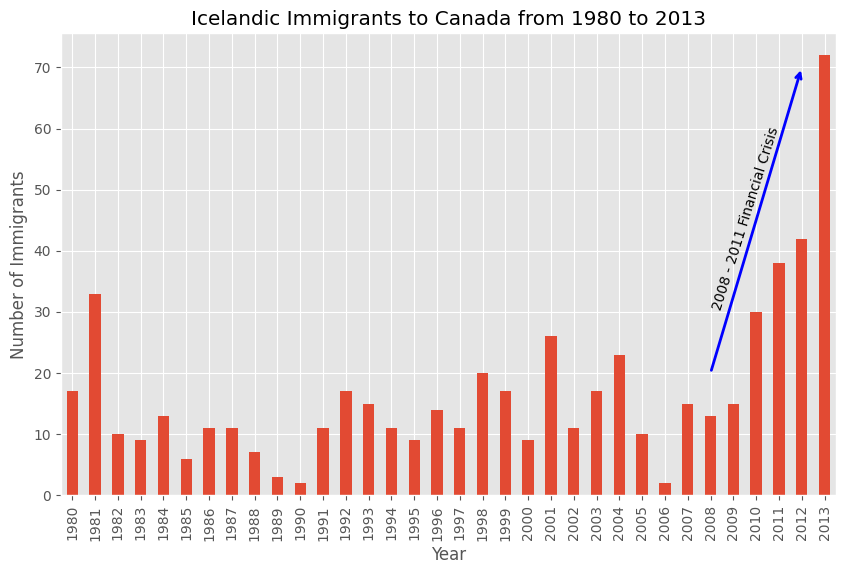

In [15]:
# Using Scriting Layer

df_Ice.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  
             xy=(32, 70),  
             xytext=(28, 20), 
             xycoords='data',  
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', 
             xy=(28, 30), 
             rotation=72.5,  
             va='bottom', 
             ha='left',  
             )

plt.show()



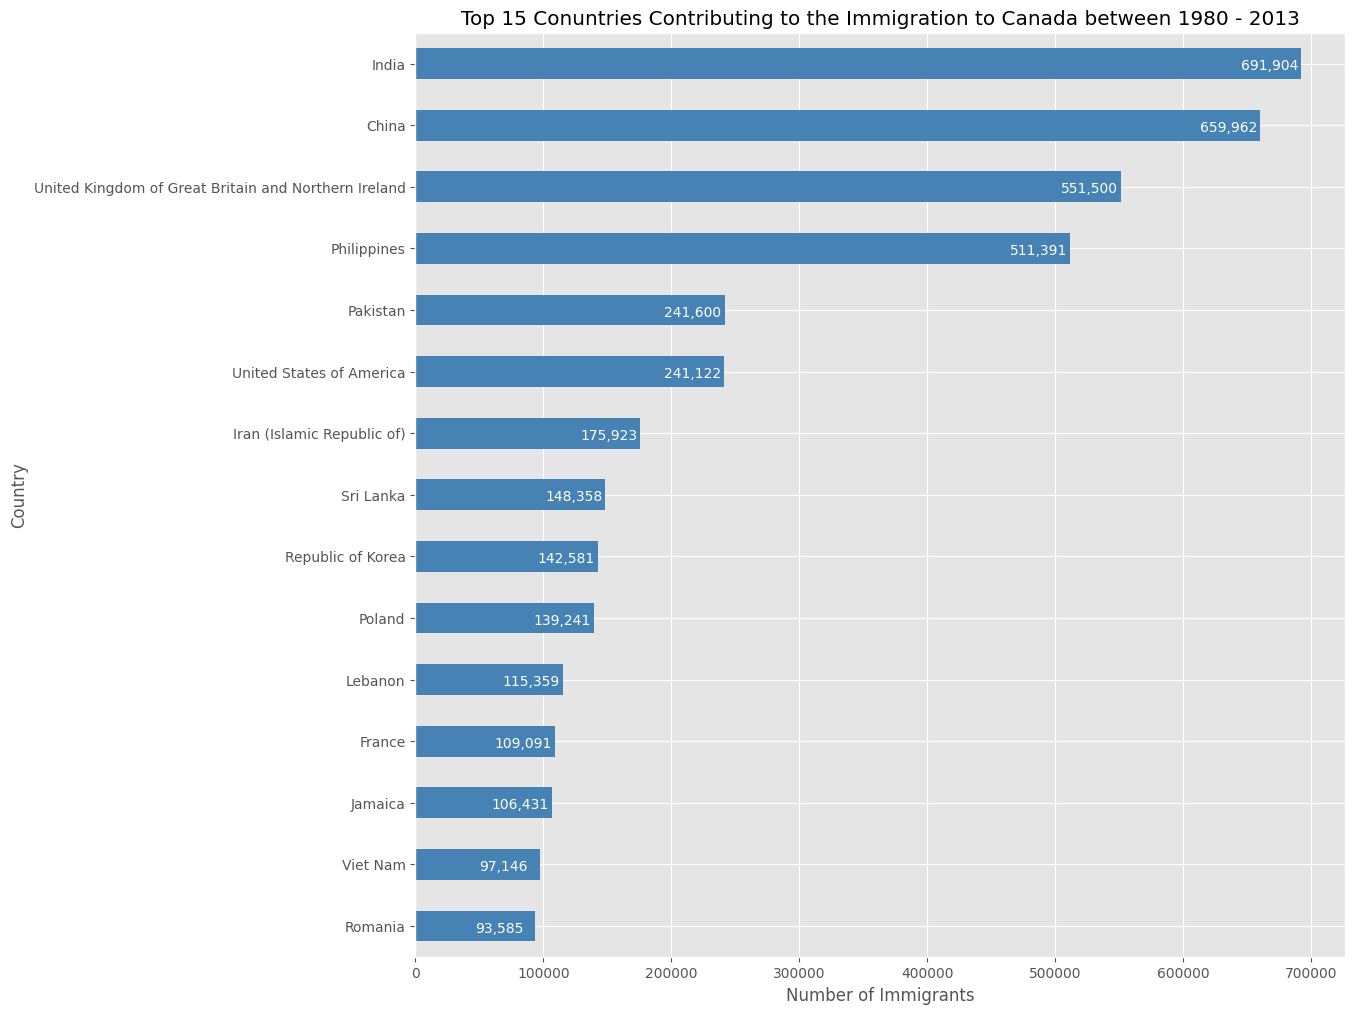

In [16]:
# Plot Data with the scripting Layer for horizontal
# Showing the horizontal bar plot for total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013 

df_can.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_can['Total'].tail(15)
df_top15


df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

for index, value in enumerate(df_top15): 
    label = format(int(value), ',')

    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

                                                 Pie chart

  Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.                                               

In [18]:
# group countries by continents and apply sum() function and the method is spliting data
df_continents = df_can.groupby('Continent', axis=0).sum()

print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


C:\Users\prabh\AppData\Local\Temp\ipykernel_17140\4064531155.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continents = df_can.groupby('Continent', axis=0).sum()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


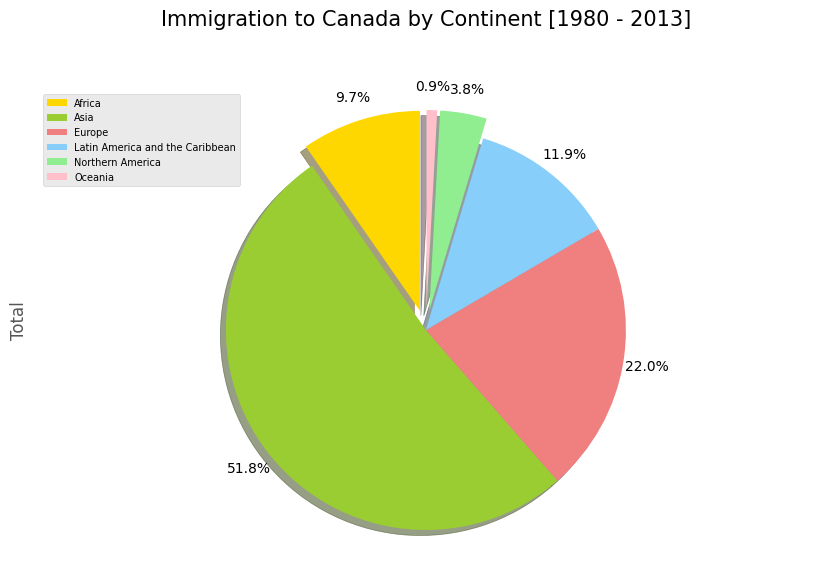

In [20]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] 
# explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # 'explode' lowest 3 continents

df_continents['Total'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,        
                            pctdistance=1.12,    
                            colors=colors_list, 
                            explode=explode_list 
                            )


plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12, fontsize = 15) 

plt.axis('equal') 

plt.legend(labels=df_continents.index, loc='upper left', fontsize=7) 

plt.show()

                                                            Box Plot

                                                            

In [25]:
# This is single box plot
# df_japan = df_can.loc[['Japan'], years].transpose()


# This is multiple box plot
df_CI= df_can.loc[['China', 'India'],years].transpose()
df_CI.head()
              

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


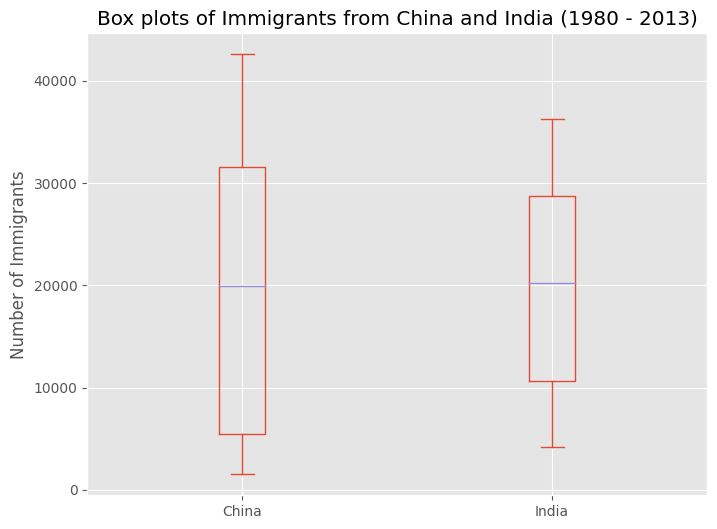

In [26]:
df_CI.plot(kind='box', figsize=(8, 6))

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')

plt.show()